# Projet d'économétrie, sujet A

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import linalg
import math
import pylab as pl
import seaborn as sns

#PARTIE I

## Question 1

> *Lire le fichier **mroz.txt**. Ne séléctionner que les observations pour lesquelles la variable **wage** est strictement positive.*

In [3]:
# Load raw file
def readRawData(filename='data/MROZ.raw'):
    f = open(filename, 'rb')
    res = ''
    try:
        byte = f.read(1)
        while byte != "":
            res += str(byte)
            byte = f.read(1)
    finally:
        f.close()
    # split data
    final_res = list()
    test = res.split('\r\n')
    for t in test:
        if len(t)>0:
            yo = filter(lambda a: a != '', t.split(' '))
            yoo = [x if x != '.' else 0 for x in yo]
            final_res.append([float(i) for i in yoo])    
    return np.array(final_res)  

#MROZ datas
#
#  Obs:   753
#
#  1. inlf                     =1 if in labor force, 1975
#  2. hours                    hours worked, 1975
#  3. kidslt6                  # kids < 6 years
#  4. kidsge6                  # kids 6-18
#  5. age                      woman's age in yrs
#  6. educ                     years of schooling
#  7. wage                     estimated wage from earns., hours
#  8. repwage                  reported wage at interview in 1976
#  9. hushrs                   hours worked by husband, 1975
# 10. husage                   husband's age
# 11. huseduc                  husband's years of schooling
# 12. huswage                  husband's hourly wage, 1975
# 13. faminc                   family income, 1975
# 14. mtr                      fed. marginal tax rate facing woman
# 15. motheduc                 mother's years of schooling
# 16. fatheduc                 father's years of schooling
# 17. unem                     unem. rate in county of resid.
# 18. city                     =1 if live in SMSA
# 19. exper                    actual labor mkt exper
# 20. nwifeinc                 (faminc - wage*hours)/1000
# 21. lwage                    log(wage)
# 22. expersq                  exper^2

In [43]:
mroz = readRawData()
datas = mroz[np.where(mroz[:,6]>0)] # select data where wage > 0 

(428, 22)

mroz[:,7] ==> column 7 = rewage, pose un soucis?

Ci-dessous proposition avec pandas

In [51]:
import pandas as pd
columns = ['inlf',
'hours',
'kidslt6',
'kidsge6',
'age',
'educ',
'wage',
'repwage',
'hushrs',
'husage',
'huseduc',
'huswage',
'faminc',
'mtr',
'motheduc',
'fatheduc',
'unem',
'city',
'exper',
'nwifeinc',
'lwage',
'expersq']
#data_df = pd.read_fwf('data/MROZ.raw',names=columns)
data_df = pd.DataFrame(mroz,columns=columns)
data_df_wage = data_df[data_df['wage']>0]
data_df_wage.shape

(428, 22)

## Question 2

> *Faire les statistiques descriptives du salaire, de l’age et de l’éducation  pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon*

In [6]:
def descriptivStats(arr):
    d = {'min':0.0,'max':0.0,'mean':0.0,'median':0.0,'var':0.0,'std':0.0}
    d['min'] = np.min(arr)
    d['max'] = np.max(arr)
    d['mean'] = np.mean(arr)    
    d['median'] = np.median(arr)
    d['var'] = np.var(arr)
    d['std'] = np.std(arr)
    return d 

In [7]:
#descriptiv stats    
stats_age = descriptivStats(datas[:,5])
print stats_age
stats_educ = descriptivStats(datas[:,6])
print stats_educ
stats_wage = descriptivStats(datas[:,7])
print stats_wage
#stats sur les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon
women_stats1 = descriptivStats(datas[np.where(datas[:,12]>np.median(datas[:,12]))])
print women_stats1
#stats sur les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon
women_stats2 = descriptivStats(datas[np.where(datas[:,12]<np.median(datas[:,12]))])
print women_stats2

{'std': 2.2804300898203005, 'min': 5.0, 'max': 17.0, 'median': 12.0, 'var': 5.2003613945578229, 'mean': 12.589285714285714}
{'std': 3.0563665052692084, 'min': 0.0, 'max': 25.0, 'median': 3.6872499999999997, 'var': 9.3413762145315147, 'mean': 4.2522651785714292}
{'std': 1.8946198494986348, 'min': 1.0, 'max': 9.9800000000000004, 'median': 3.7999999999999998, 'var': 3.5895843741142297, 'mean': 4.1453869047619047}
{'std': 7055.4457334776034, 'min': -0.96076519999999999, 'max': 90800.0, 'median': 10.0, 'var': 49779314.498047315, 'mean': 1658.2715233383929}
{'std': 3507.7048117134777, 'min': -1.8226309999999999, 'max': 22500.0, 'median': 7.5, 'var': 12303993.046117885, 'mean': 917.21127278479435}


####CODE PANDAS

In [57]:
data_df_wage[['wage','age','educ']].describe()

,wage,age,educ
count,428.000000,428.000000,428.000000
mean,4.177682,41.971963,12.658879
std,3.310282,7.721084,2.285376
min,0.128200,30.000000,5.000000
25%,2.262600,35.000000,12.000000
50%,3.481900,42.000000,12.000000
75%,4.970750,47.250000,14.000000
max,25.000000,60.000000,17.000000


In [63]:
median_wage = data_df_wage['wage'].median()
data_df_husband_super_median = data_df_wage[data_df_wage['huswage'] >= median_wage]
data_df_husband_inferior_median = data_df_wage[data_df_wage['huswage']< median_wage]

In [64]:
data_df_husband_super_median[['wage','age','educ']].describe()

,wage,age,educ
count,380.000000,380.000000,380.000000
mean,4.209165,41.973684,12.684211
std,3.335807,7.674743,2.299538
min,0.128200,30.000000,5.000000
25%,2.274725,35.000000,12.000000
50%,3.566500,43.000000,12.000000
75%,5.089100,47.000000,14.000000
max,25.000000,60.000000,17.000000


In [65]:
data_df_husband_inferior_median[['wage','age','educ']].describe()

,wage,age,educ
count,48.000000,48.000000,48.000000
mean,3.928437,41.958333,12.458333
std,3.122774,8.163120,2.182701
min,1.201900,30.000000,8.000000
25%,2.135750,35.000000,11.750000
50%,2.945800,40.500000,12.000000
75%,4.352375,49.250000,14.000000
max,18.267000,59.000000,16.000000


## Question 3

>*Faire l'histogramme de la variable wage. Calculer le log de wage et faire l'histogramme. Comparez les deux histogrammes et commentez*

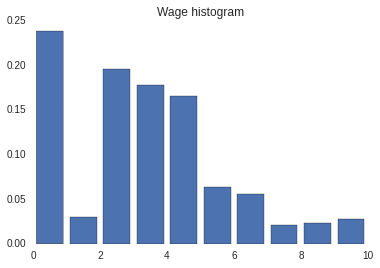

In [101]:
bins = np.arange(math.ceil(stats_wage['min'])-1,math.ceil(stats_wage['max'])+1)
pl.figure()
pl.hist(datas[:,7], bins, normed=1, histtype='bar', rwidth=0.8)
pl.title("Wage histogram")
pl.show()

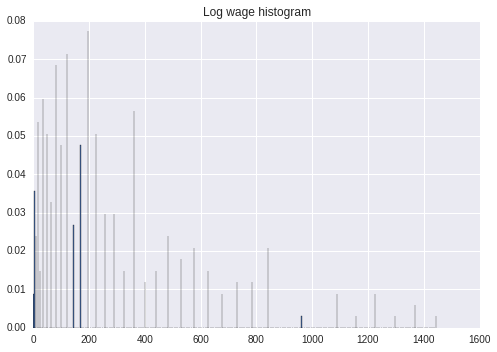

In [9]:
stats_wage_log = descriptivStats(datas[:,21])
bins2 = np.arange(math.ceil(stats_wage_log['min']),math.ceil(stats_wage_log['max'])+1)
pl.figure()
pl.hist(datas[:,21], bins2, normed=1, histtype='bar', rwidth=0.8)
pl.title("Log wage histogram")
pl.show()

#Version pandas

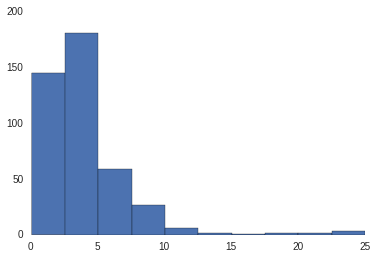

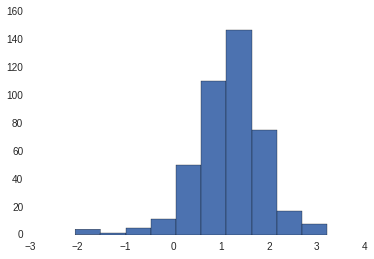

In [148]:
data_df_wage['wage'].hist(bins=10)
plt.show()
lwage = data_df_wage['wage'].apply(np.log)
lwage.hist(bins=10)
plt.show()

## Question 4

> *Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de multicollinéarité si l'on utilise ces variables comme variables explicatives ?*

In [93]:
#Pearson correlation
#return (Pearson’s correlation coefficient,2-tailed p-value)
correlation1 = stats.pearsonr(datas[:,15],datas[:,16])
print correlation1
correlation2 = stats.pearsonr(datas[:,14],datas[:,15])
print correlation2

(0.066882765014884896, 0.16722307898370126)
(0.5540632184311679, 8.3023444358239354e-36)


#Version pandas

In [89]:
data_df_wage[['wage','motheduc','fatheduc']].corr()

,wage,motheduc,fatheduc
wage,1.000000,0.057074,0.107736
motheduc,0.057074,1.000000,0.554063
fatheduc,0.107736,0.554063,1.000000


## Question 5

> *Faites un graphique en nuage de point entre wage et educ, wage et exper, wage et fatheduc. Commentez. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"*

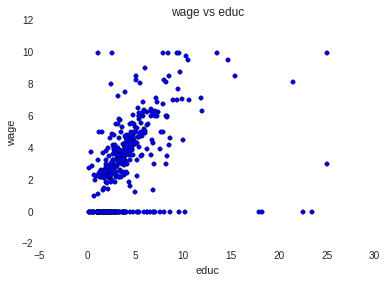

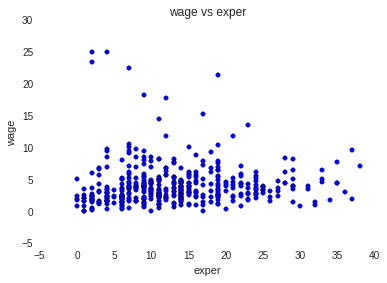

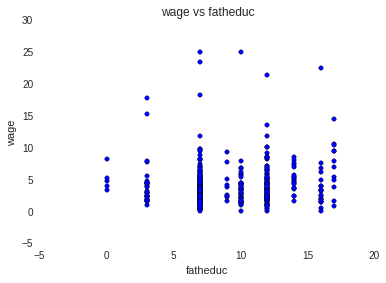

In [100]:
#wage vs educ
pl.figure()
pl.scatter(datas[:,6],datas[:,7])
pl.xlabel('educ')
pl.ylabel('wage')
pl.title('wage vs educ')
pl.show()
#wage vs exper
pl.figure()
pl.scatter(datas[:,18],datas[:,6])
pl.xlabel('exper')
pl.ylabel('wage')
pl.title('wage vs exper')
pl.show()
#wage vs fatheduc
pl.figure()
pl.scatter(datas[:,15],datas[:,6])
pl.xlabel('fatheduc')
pl.ylabel('wage')
pl.title('wage vs fatheduc')
pl.show()

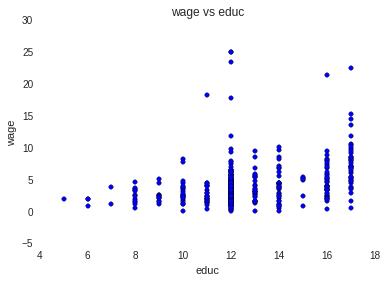

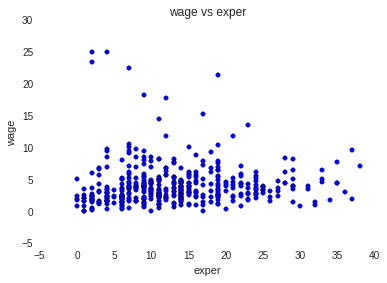

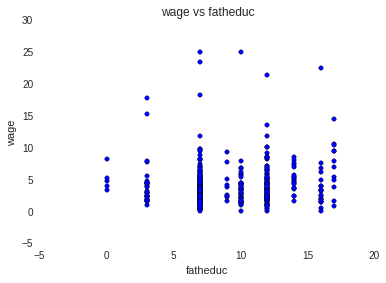

In [99]:
educ = data_df_wage['educ']
wage = data_df_wage['wage']
exper = data_df_wage['exper']
fatheduc = data_df_wage['fatheduc']

#wage vs educ
pl.figure()
pl.scatter(educ,wage)
pl.xlabel('educ')
pl.ylabel('wage')
pl.title('wage vs educ')
pl.show()
#wage vs exper
pl.figure()
pl.scatter(exper,wage)
pl.xlabel('exper')
pl.ylabel('wage')
pl.title('wage vs exper')
pl.show()
#wage vs fatheduc
pl.figure()
pl.scatter(fatheduc,wage)
pl.xlabel('fatheduc')
pl.ylabel('wage')
pl.title('wage vs fatheduc')
pl.show()

## QUESTION 6

>  *Quelle est l'hypothèse fondamentale qui garanti des estimateurs non biaisés ?*

CF le cours 

## QUESTION 7

>  *Faire la régression de wage en utilisant les variables explicatives une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus. *

[ 0.36975203  0.4600477   0.02381995  0.01524479  0.03617319 -0.06189091
 -2.40345399]


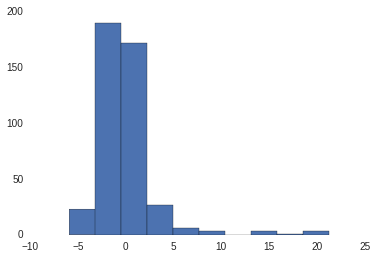

In [147]:
data_df_wage_X = data_df_wage[['city','educ','exper','nwifeinc','kidslt6','kidsge6']].copy()
data_df_wage_X['cste'] = 1
data_df_wage_Y = data_df_wage['wage']
X = data_df_wage_X.as_matrix()
Y = data_df_wage_Y = data_df_wage['wage']

(data_df_wage_X.T.dot(data_df_wage_X))
print linalg.inv(data_df_wage_X.T.dot(data_df_wage_X)).dot(data_df_wage_X.T).dot(data_df_wage_Y)

beta = linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
prediction = X.dot(beta)
residus = Y - prediction
plt.hist(residus)
plt.show()

## QUESTION 8

>  *Faire la régrssion de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l’histogramme des résidus.*

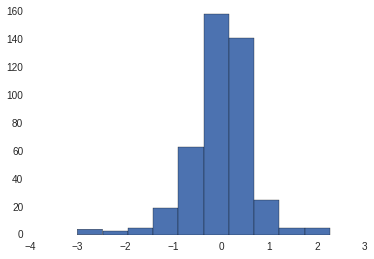

In [149]:
data_df_wage_X = data_df_wage[['city','educ','exper','nwifeinc','kidslt6','kidsge6']].copy()
data_df_wage_X['cste'] = 1
X = data_df_wage_X.as_matrix()
Y = lwage


beta = linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
prediction = X.dot(beta)
residus = Y - prediction
plt.hist(residus)
plt.show()

## QUESTION 9

>  *Tester l'hypothèse de non significativité de exper avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values. Tester l’hypothèse que le coefficient associé à educ est égal à 10% avec un seuil de significativité de 5% (test à alternatif des deux côtés)*

## QUESTION 10

>  *De combien augmente wage avec 10 années d’expérience ?*

## QUESTION 11

>  *Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.*

## QUESTION 12

>  *En utilisant le modèle de la question 8, faire le test d'hétéroscédasticité de forme linéaire. Corriger le problème par rapport à la variable la plus importante en utilisant la méthode des moindres carrés pondérés.*

## QUESTION 13

>  *Tester le changement de structure de la question 7 entre les femmes qui ont plus de deux enfants de moins de 6 ans et les autres : test sur l'ensemble des coefficients.*

## QUESTION 14

>  *Transformer la variable kidslt6 en variables binaires. Refaire la question 7 avec ces variables en utilisant la catégorie kidslt6 = 1 comme référence. Interprétez les paramètres associés aux variables binaires.*

## QUESTION 15

>  *A partir de l’échantillon global, faire une régression de inlf sur une constante, city, educ, age, kidslt6, kidsgt6. Commentez le modèle et les résultats des tests de significativité pour chacun des coefficients estimé (test alternatif des deux côtés)*

## QUESTION 16

>  *Développer le modèle probit et obtenir la fonction de log-vraisemblance l(.).*

## QUESTION 17

>  *Calculer la matrice d'information E($-\partial l / \partial \beta \partial \beta '$) [astuce: E(yi) = p(yi=1)]. Commentez les programmes suivants :*

## QUESTION 18

>  *Pourquoi faut-il imposer une restriction sur les paramètres ?*

## QUESTION 19

>  *Estimer le modèle probit de inlf sur une constante, city, educ, age, kidslt6, kidsgt6 en utilisant la commande probit(y,X). *

## QUESTION 20

>  *Calculer les effets partiels pour l'ensemble des variables explicatives : p(y1)/xk (k = 1, ..., K), où K est le nombre de variables explicatives. Comparer vos résultats à ceux obtenus à la question 15. Commentez.*

#PARTIE II

## QUESTION 21

>  *Ouvrir le fichier volat.raw; attention aux valeurs manquantes.*

## QUESTION 22

>  *Pourquoi doit-on stationnariser les séries ?*

## QUESTION 23

>  *Faire le test de racine unitaire de log(sp500) H0: $\rho$ = 1 et le test de Dickey Fuller.*

## QUESTION 24

>  *Interpréter l'autocorrélogramme et l'autocorrélogramme partiels de pcsp et de divyld. Quelle est la différence entre ces deux graphiques ?*

## QUESTION 25

>  *25. Proposer une modélisation AR(p) de chacune des séries en utilisant les outils et tests vu au cours.*

## QUESTION 26

>  *Faire une régression de pcsp sur i3 et divyld. Interpréter les résultats. Tester la significativité jointe des variables explicatives*

## QUESTION 27

>  *Tester l'autocorrélation des erreurs.*